### Data wrangling without loss

Inspect the “patients_lab_results_messy.csv” dataset

What is wrong with the dataset? Look for e.g. 
- Inconsistent labelling
- Inconsistent casing
- Missing values

Fix the issues without loosing any data! 

Discuss the reversibility of your steps and think about how you can make sure that you did not loose any data!


In [1]:
import pandas as pd

df = pd.read_csv("patients_results_messy.csv")
df

,Patient_ID,Visit Date,age,Gender,Blood Pressure (mmHg),Chol (mg_dl),glucose,Notes
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up


In [4]:
df.glucose


0         95
1        NaN
2         88
3    missing
4         89
5         89
6     ninety
7        100
8         92
9         97
Name: glucose, dtype: object

Clean up column names using string methods:

In [5]:
df.columns = df.columns.str.lower().str.replace('[^a-z0-9]+', '_', regex=True).str.strip('_')
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up


Split blood pressure values into two columns, using the string method split():

In [7]:
df[['systolic', 'diastolic']] = df['blood_pressure_mmhg'].str.split('/', expand=True)
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline,120,80
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat,118,78
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose,125,82
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline,130,85
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-,128,84
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up,132,88


In [11]:
df.systlolic = df.systolic.apply(pd.to_numeric)
df.diastolic = df.diastolic.apply(pd.to_numeric) #so after we split 
#we need to convert to numeric from string to int
df.systlolic

0    120
1    135
2    115
3    140
4    118
5    118
6    125
7    130
8    128
9    132
Name: systolic, dtype: int64

Convert glucose values:

In [12]:
df['glucose'] = pd.to_numeric(df['glucose'], errors="coerce") # avoids crashing if wrong types are parsed
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,Male,120/80,180.0,95.0,baseline,120,80
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,male,115/75,190.0,88.0,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,NaN,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
6,P007,2021/01/07,NaN,Male,125/82,200.0,NaN,typo in glucose,125,82
7,P008,2021-01-08,46.0,Female,130/85,195.0,100.0,baseline,130,85
8,P009,2021-01-09,50.0,female,128/84,NaN,92.0,-,128,84
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97.0,follow-up,132,88


Standardize gender:

In [13]:
df['gender'] = df['gender'].str.upper().map({'MALE': 'M', 'FEMALE': 'F', 'M': 'M', 'F': 'F'})
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80
1,P002,2021/1/05,45.0,F,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,NaN,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
6,P007,2021/01/07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88


Parse dates to standard format:

In [14]:
# standardize visit_date
df['visit_date'] = (
    df['visit_date']
    .str.replace(r'[./]', '-', regex=True)  # unify separators
    .str.strip()
)

df['visit_date_clean'] = pd.to_datetime(df['visit_date'], errors='coerce')
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,p004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10


Fill or flag missing data (no deletions) in some of the columns:

Further cleanup: patient_id!

In [ ]:
df.patient_id= df.patient_id.str.upper()
df #we first here should standardize the patient ids to upper case 
#because some are lower case

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10


Convert type in systolic and diastolic pressure columns (pd.to_numeric)

Add the extended patient list and the patients info.

In [25]:
df_extension = pd.read_csv("patient_list_extended.csv")
df_2merge = pd.read_csv("patients_info.csv")


In [29]:
df_extended = pd.concat([df,df_extension], ignore_index=True)

In [31]:
df_complete = pd.merge(df_extended,df_2merge,on="patient_id",how="outer")
df_complete.head()

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No


In [33]:
df_complete2 = df_extended.join(df_2merge, on = "patient_id", how="outer")

ValueError: You are trying to merge on object and int64 columns for key 'patient_id'. If you wish to proceed you should use pd.concat

In [35]:
print(df.shape)
print(df_extension.shape)
print(df_extended.shape)
print(df_2merge.shape)
print(df_complete.shape)

(10, 11)
(42, 10)
(52, 11)
(38, 3)
(56, 13)


In [36]:
df_complete.to_csv("patients_list_complete.csv", index=False)

In [43]:
df_complete.isna().sum()

patient_id              0
visit_date              0
age                     9
gender                  0
blood_pressure_mmhg     0
chol_mg_dl              7
glucose                15
notes                  21
systolic                0
diastolic               0
visit_date_clean       47
bmi                    18
smoker                 24
is_age_missing          0
dtype: int64

In [40]:
#df_complete.age.isna() this checks if there are any missing values in age column

In [42]:
df_complete["is_age_missing"] = df_complete.age.isna()
df_complete

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker,is_age_missing
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No,False
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes,False
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No,False
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No,False
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,22.5,No,False
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07,24.2,Yes,True
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08,23.0,No,False
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09,27.0,No,False
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10,22.4,No,False


In [51]:
df_dropna_glucose = df_complete.dropna(subset=['glucose']) 
#here we are dropping rows with missing glucose values 
# you can check above for the difference of before and after
df_dropna_glucose

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker,is_age_missing
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No,False
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No,False
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,22.5,No,False
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08,23.0,No,False
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09,27.0,No,False
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10,22.4,No,False
10,P011,2021-01-03,33.0,M,110/81,177.0,85.0,baseline,110,81,NaT,22.5,No,False
12,P013,2021/1/05,69.0,M,125/75,190.0,82.0,NaN,125,75,NaT,24.0,No,False
13,P014,2021.01.04,42.0,F,130/91,228.0,125.0,new patient,130,91,NaT,21.0,NaN,False


In [53]:
df_dropna_glucose.isna().sum()

patient_id              0
visit_date              0
age                     8
gender                  0
blood_pressure_mmhg     0
chol_mg_dl              6
glucose                 0
notes                  16
systolic                0
diastolic               0
visit_date_clean       35
bmi                    15
smoker                 18
is_age_missing          0
dtype: int64

<Axes: ylabel='Count'>

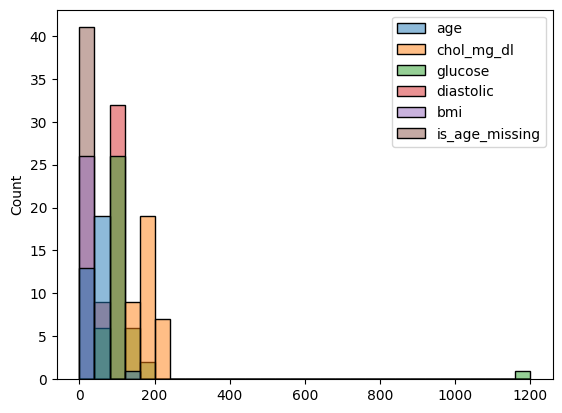

In [54]:
import seaborn as sns

sns.histplot(df_dropna_glucose)

In [57]:
df_complete.duplicated().sum()
df_complete.duplicated(subset=["age","chol_mg_dl"]).sum()

np.int64(8)

In [10]:
df["is_age_missing"]=df.age.isna()

In [ ]:
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,is_age_missing
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline,False
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-,False
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck,False
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat,False
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat,False
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose,True
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline,False
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-,False
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up,False


In [17]:
df_dropna_glucose = df.dropna(subset="glucose")

In [18]:
df_dropna_glucose

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,is_age_missing
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline,False
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck,False
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat,False
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat,False
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose,True
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline,False
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-,False
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up,False


<Axes: ylabel='Count'>

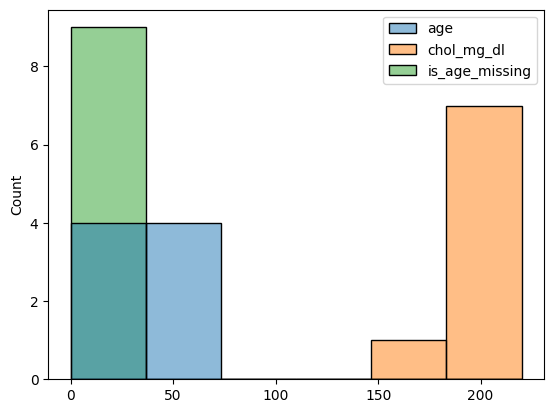

In [23]:
import seaborn as sns

sns.histplot(df_dropna_glucose)